# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [30]:
import numpy as np
from tensorflow.keras import layers, models

In [1]:
import matplotlib.pyplot as plt

#Load the Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Task: Normalize the data to have pixel values between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

Visualize 5 random images from the training set with their labels.

In [26]:
y_train[6]

7

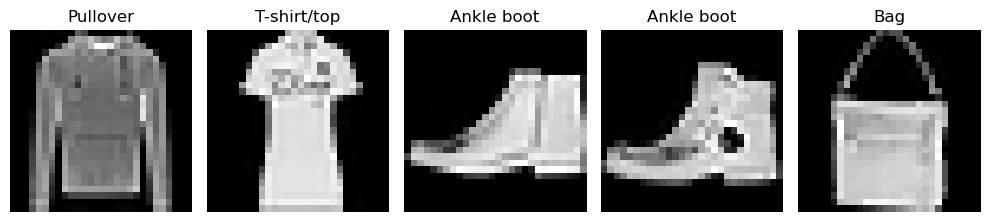

In [13]:
# Your code here for visualization
# Define class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Select 5 random images
random_indices = np.random.choice(len(x_train), 5, replace=False)

# Plot the images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")
plt.tight_layout()
plt.show()

Reshape the data to include a channel dimension and confirm the new shape.

In [28]:
# Task: Reshape x_train and x_test to include the channel dimension
# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Task: Build your model here
model = models.Sequential([
    # First convolutional layer with max pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # third convolutional layer with max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output of the convolutional layers
    layers.Flatten(),

    # Fully connected dense layer
    layers.Dense(128, activation='relu'),

    # Output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])

Compile your model with an appropriate optimizer, loss function, and metric.

In [52]:
# Task: Compile your model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [54]:
# Task: Train the model and store the training history in a variable
history = model.fit(
    x_train, y_train, 
    epochs=15, 
    validation_split=0.2, 
    batch_size=32
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7035 - loss: 0.8336 - val_accuracy: 0.8263 - val_loss: 0.4890
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8383 - loss: 0.4475 - val_accuracy: 0.8500 - val_loss: 0.4062
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8645 - loss: 0.3734 - val_accuracy: 0.8660 - val_loss: 0.3710
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8791 - loss: 0.3276 - val_accuracy: 0.8737 - val_loss: 0.3517
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8898 - loss: 0.2976 - val_accuracy: 0.8788 - val_loss: 0.3317
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9018 - loss: 0.2683 - val_accuracy: 0.8862 - val_loss: 0.3155
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9080 - loss: 0.2463 - val_accuracy: 0.8861 - val_loss: 0.3149
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9150 - 

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [56]:
# Task: Evaluate the model on the test data
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%") # 2f used to set the number of decimal places to 2 and f stands for fixed point notation

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8792 - loss: 0.4485
Test Accuracy: 87.92%


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


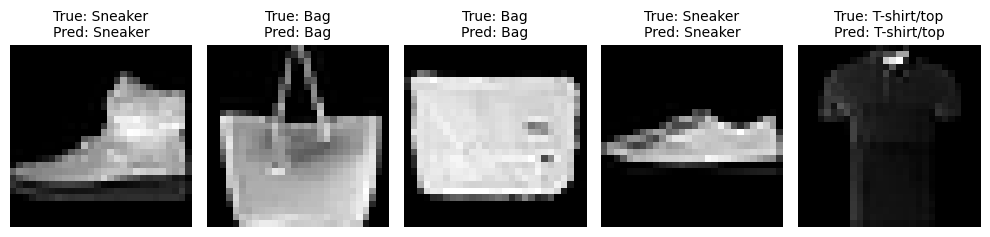

In [57]:
# Task: Use model.predict() and display predictions
# Predict the labels for the test set
predictions = model.predict(x_test)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Select 5 random test images
random_indices = np.random.choice(len(x_test), 5, replace=False)

# Display the images with their predicted and true labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")  # Remove channel dimension for grayscale display
    plt.title(
        f"True: {class_names[y_test[idx]]}\nPred: {class_names[predicted_classes[idx]]}",
        fontsize=10
    )
    plt.axis("off")
plt.tight_layout()
plt.show()

Construct a confusion matrix to visualize how well your model performed across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


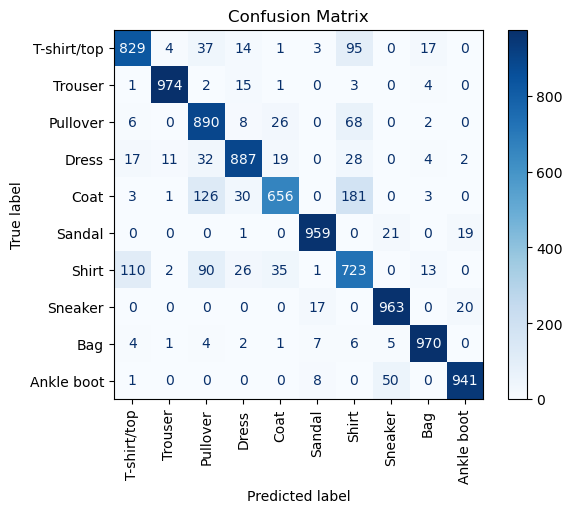

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Generate predictions for the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()